In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random

#import cv2
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist

#### Carregar as fotos
Carrega a foto, reescalona (resize) e retorna o seu formato em RGB.

In [20]:
def photo_open(filename, rescale=1):
    photo = Image.open(filename)
    photo = photo.convert('RGB')
    #Altera o tamanho da imagem
    photo =photo.resize( ( int(photo.size[0]/rescale), int(photo.size[1]/rescale) ), Image.ANTIALIAS)
    return photo

#### Carregar os pixels RGB da imagem

retorna um DataFrame com as coordenadas RGB da imagem.

In [21]:
def pick_pixels(photo):
    n , m = photo.size
    ibagem = []
    pixels = photo.load()
    for i in range(n):
        for j in range(m):
            ibagem.append(list(pixels[i,j]) )
    return pd.DataFrame(ibagem)

#### Colorir a imagem
Colore a imagem com as respectivas cores dos centroides. 

In [22]:
def coloring(photo, labels, centers, rescale=1):
    n, m = photo.size
    pixels = photo.load()
    for i in range(n):
        for j in range(m):
            numb = [int(number) for number in centers[labels[i*m + j]] ] 
            
            #O pixel corrente recebe a cor do cluster
            pixels[i,j]= tuple(numb)
    
    #Altera o tamanho da imagem
    photo = photo.resize( (int( photo.size[0]*rescale), int(photo.size[1]*rescale)), Image.ANTIALIAS)
    return photo

### Exemplo de Fluxo de Execução
Isto deve ser feito para cada imagem

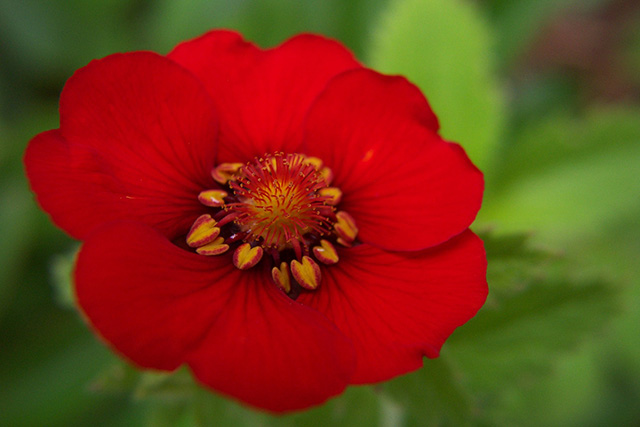

In [24]:
# código exemplo
photo = photo_open('photo001.jpg')
#pixels = pick_pixels(photo)
# labels, centers = KMeans(k = 4)     ....  chama o KMeans ou Fuzzy-CMeans 
#photo = coloring(photo, labels, centers)

photo

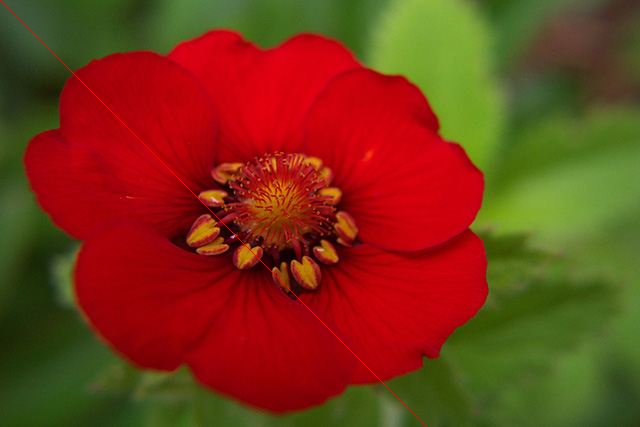

In [25]:
def coloring2(photo):#, labels, centers):
    n, m = photo.size #232324 X 3
    pixels = photo.load()
    
    for i in range(n):
        for j in range(m):
            #numb é algum valore entre 0 e 255
            #numb = [int(number) for number in centers[labels[i*m + j]] ] 
            
            #O pixel corrente recebe a cor do cluster
            pixels[i,j]= 255
    return photo

photo = coloring2(photo)
photo

In [6]:
lendata = pixels.shape[0]
data_np = pixels.values
print(lendata)
print(data_np)

273280
[[62 85 59]
 [60 83 57]
 [60 83 57]
 ...
 [40 56 20]
 [41 57 21]
 [37 53 17]]


In [20]:
lendata = pixels.shape[0]
data = pixels
data_np = pixels.values

#Número de clusters
k = 2

#Vetor que indica em qual cluster está a amostra
idx = np.zeros((lendata,1))

#Matriz de partições
particao = np.zeros((lendata,k))

############################ Passo 1 ###############################
#Atribuir cada ponto a um determido cluster de forma aleatória
for i in range(lendata):
    rnd = np.random.randint(k)
    particao[i][rnd] = 1
    idx[i] = rnd

centr = calc_centroids(data, particao)

In [24]:
dist_total = 0
itr = 0
  
for loop in range(5):  
    ################### Passo 2 ##############################
    dist = np.zeros((lendata,1))
    for i in range(lendata):
        menor_dist = np.inf
        for j in range(k):
            data_atual = data_np[i,:]
            menor_dist_aux = np.linalg.norm(data_atual - centr[j,:])
            if menor_dist_aux <= menor_dist:
                menor_dist = menor_dist_aux
                idx[i] = j
                
    ################### Passo 3 ###############################
                dist[i] = menor_dist
    dist_total_aux = np.sum(dist)

    #Condição para sair do laço
    if dist_total_aux == dist_total:
        break
    else:
        dist_total = dist_total_aux
        itr += 1

    print(dist_total)
    ###################### Passo 4 #############################
    particao = np.zeros((lendata,k))
    for i in range(lendata):
        rnd = idx[i]
        particao[i][int(rnd)] = 1

    centr = calc_centroids(data, particao)

    #print('Número de iterações:', itr)

9616557.189332973
9616556.9368923
9616558.776335755


In [7]:
# funcao que obtem os centroides
# centroids: np.array(K x N) - centroides (K vetores de M features) de cada grupo
def calc_centroids(data, partitions):
    
    #Número de características
    nfeatures = data.shape[1]
    
    #Número de partições
    K = partitions.shape[1]
    
    #K centroides com dimensões igual ao número de features
    centroids = np.zeros([K,nfeatures])
    
    #Valores do DataFrame de dados
    data_np = data.values
    
    #Cálcula a posição dos centóides
    for i in range(K):
        #Verifica quais amostras estão contidas no cluster i
        idx_nonzero =  np.flatnonzero(partitions[:,i])
        
        #Armazena o conteúdo presente no cluster i
        data_i = data_np[idx_nonzero,:]
        
        #Posiciona o centróide na posição média do cluster i 
        centroids[i] = np.mean(data_i, axis=0)
    return centroids